# Chapter 03. 신경망 (part 1)
## hfpsych lab workshop
2019.7.19 Fri.
Yoon Kyung Lee

### 3.1. 퍼셉트론 (복습)
 - note.

### 3.1.3. 활성화 함수 

퍼셉트론의 활성화 함수는 **계단함수**

### 계단함수식

\begin{equation*}
h(x) = 0 (x <=0)
\end{equation*}

\begin{equation*}
          1 (x > 0)
\end{equation*}


그림 3-4. 활성화 함수의 처리 과정 (그림 참조)

### 3.2.2. 계단 함수 구현하기

In [1]:
def step_function(x):
  if x > 0: #입력이 0을 넘으면
    return 1 #1을 출력
  else: #아니면
    return 0 #0을 출력

- 장점: 단순하고 쉽다
- 단점 **실수(부동소수점)""만 받는다. 즉, 넘파이 배열을 인수로 넣을 수 없다.**

In [2]:
import numpy as np

In [3]:
#넘파이 배열을 인자값으로 넣기

def step_function(x):
  y = x > 0
  return y.astype(np.int)

In [4]:
# 넘파이 배열 x을 준비, 그 넘파이 배열에 부등호 연산을 수행

x = np.array([-1.0, 1.0, 2.0])

In [5]:
x

array([-1.,  1.,  2.])

In [6]:
y = x > 0

In [7]:
y #bool 배열인 것을 확인할 수 있다. 

array([False,  True,  True])

우리가 원하는 계단 함수는 0이나 1의 'int'형을 출력하는 함수이다. 따라서 배열 y의 원소를 bool에서 int형으로 바꿔준다. 

In [8]:
y = y.astype(np.int)

In [9]:
y

array([0, 1, 1])

## 3.2.3. 계단함수 그래프

In [10]:
import matplotlib.pylab as plt

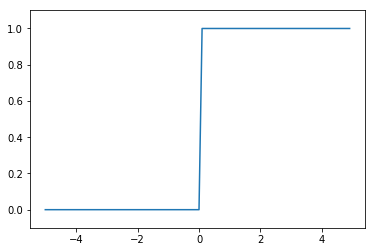

In [11]:
#그림 3-6. 계단함수의 그래프 

def step_function(x):
  return np.array(x > 0, dtype = np.int)

x = np.arange(-5.0, 5.0, 0.1)

y = step_function(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1) #y축의 범위 지정
plt.show()

위에서 보듯이 계단함수는 0을 경계로 출력이 0에서 1 (또는 1에서 0)으로 바뀐다. 

## 3.2.4. 시그모이드 함수 구하기 


### 시그모이드 함수식

\begin{equation*}
h(x) = \frac{1}{1 + exp(-x)} 
\end{equation*}

In [12]:
def sigmoid(x):
  return 1/ (1 + np.exp(-x))

In [13]:
x = np.array([-1.0, 1.0, 2.0]) 

In [14]:
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

numpy의 브로드캐스트 기능 덕에 넘파이 배열과 스칼라 값의 연산을 넘파이 배열의 원소 각각과 스칼라 값의 연산으로 바꿔 수행해줌

다음 예에서 복습 겸 다시 살펴보자

In [15]:
t = np.array([1.0, 2.0, 3.0])

In [16]:
1.0 + t

array([2., 3., 4.])

In [17]:
1.0/t

array([1.        , 0.5       , 0.33333333])

### 시그모이드 함수 시각화

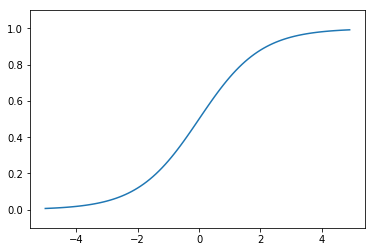

In [18]:
x = np.arange(-5.0, 5.0, 0.1)

y = sigmoid(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1) #y축 범위 지정
plt.show()

### 3.2.5. 시그모이드 함수 vs 계단 함수


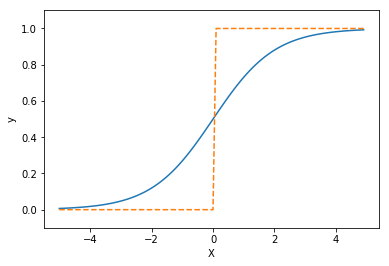

In [19]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x)
y2 = step_function(x)

plt.plot(x, y1, label="sigmoid")
plt.plot(x, y2, linestyle="--", label="step_function")
plt.xlabel("X") # x축 이름
plt.ylabel("y") # y축 이름
plt.ylim(-0.1, 1.1)
plt.show()

### 3.2.6. 차이점과 공통점 

차이점 
- "매끄러움" (=smoothness)
- 계단 함수: 0 아니면 1의 값만 출력  vs 시그모이드: 실수 (연속적인 값)

공통점
- 아무리 작거나 커도 출력은 0~1사이. 
- 입력이 작을 때의 출력은 0에 가깝고 (혹은 0), 입력이 커지면 1에 가까워지는 (혹은 1) 구조 
- 즉, 입력이 중요하면 큰 값을, 입력이 중요하지 않으면 작은 값을 출력

### 3.2.7 비선형 함수

I. ReLU<sup>Rectified Linear Unit</sup>: 입력이 0을 넘으면 입력값 그대로 출력하고  0 이하면 0을 출력하는 함수

### ReLU 함수식

\begin{equation*}
h(x) = x ( x > 0) 
\end{equation*}


In [22]:
def relu(x):
    return np.maximum(0, x) # 넘파이의 maximum함수를 사용하여 두 입력 중 큰 값을 선택해 반환한다

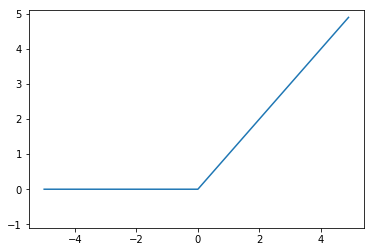

In [23]:
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1.1, 5.1) # y축의 범위 지정
plt.show()